In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [4]:
# with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/ECDFS_1000_v3.pkl', 'rb') as f:
with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/ECDFS_1000_psf_e12.pkl', 'rb') as f:
    rsp_sample = pkl.load(f)

with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/ECDFS_3000_psf.pkl', 'rb') as f:
    rsp_sample2 = pkl.load(f)

False
False


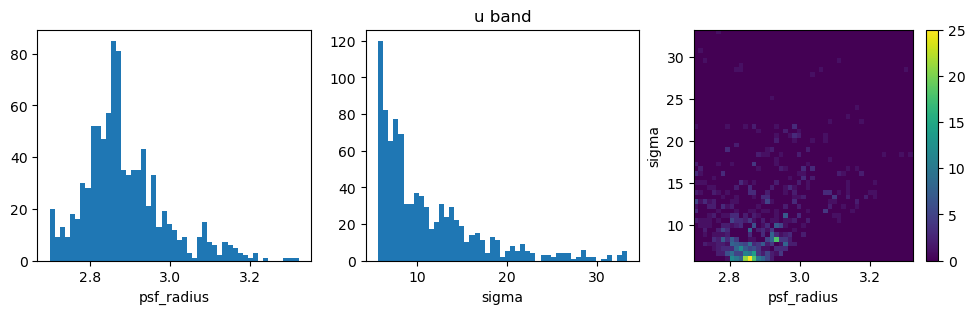

0.4169950512321295
False
False


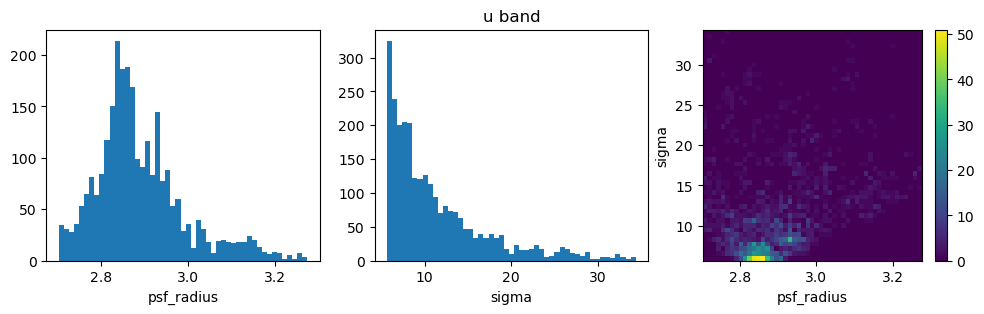

0.3810671688099405
False
False


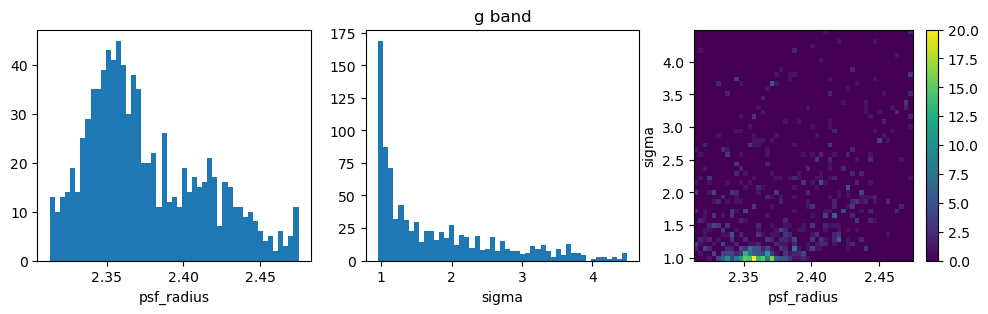

0.24078247204904016
False
False


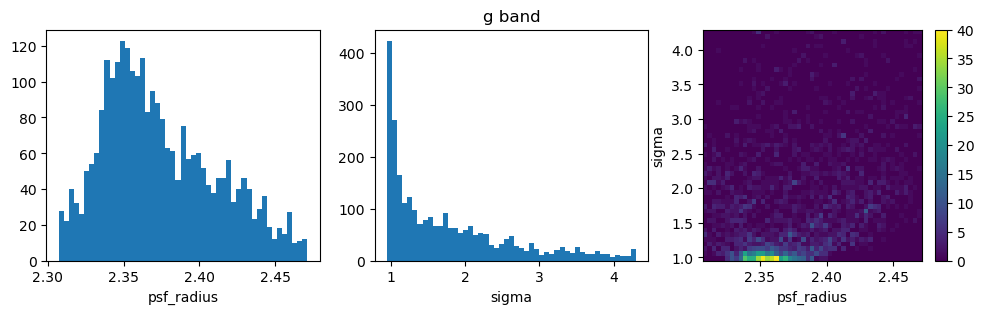

0.2600276679198844
False
False


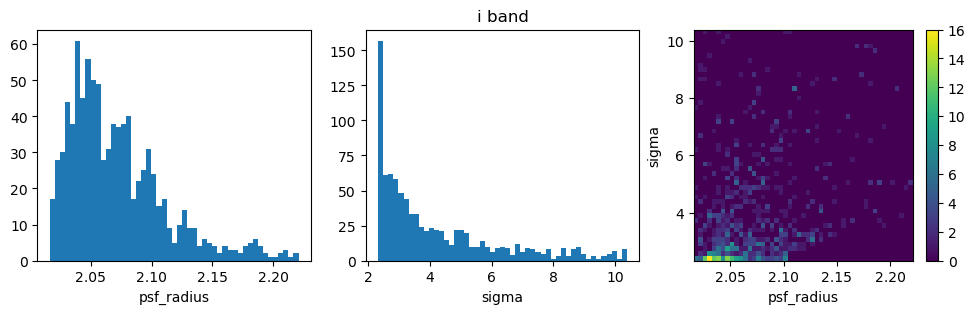

0.4043348590346573
False
False


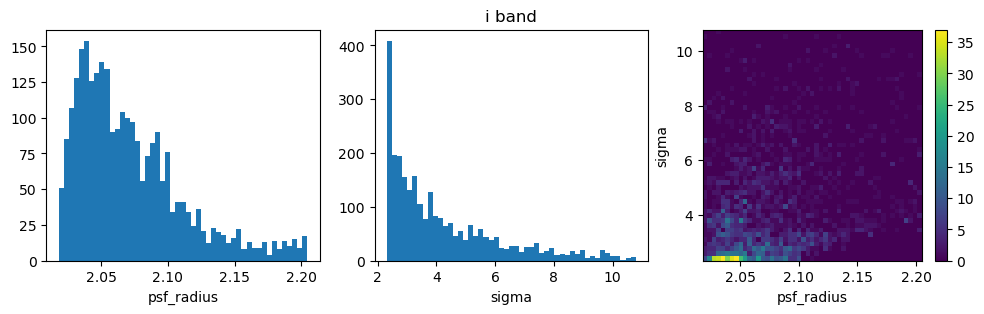

0.4149025088287367
False
False


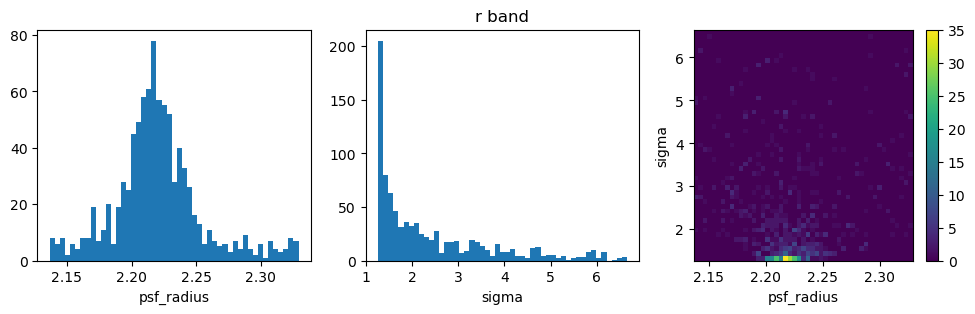

0.3840113277970301
False
False


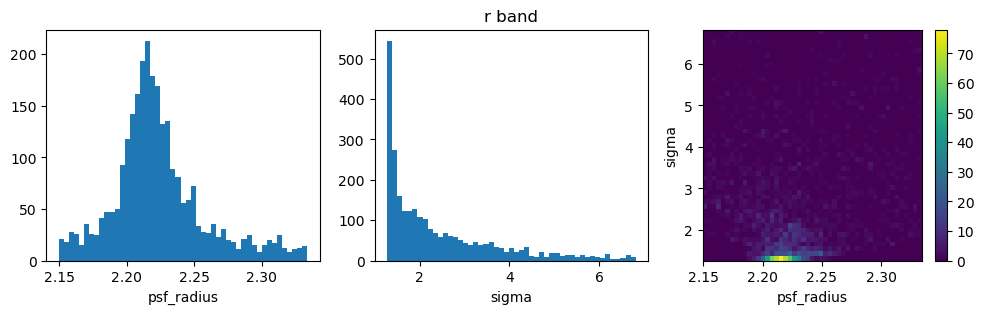

0.31205500556277316
False
False


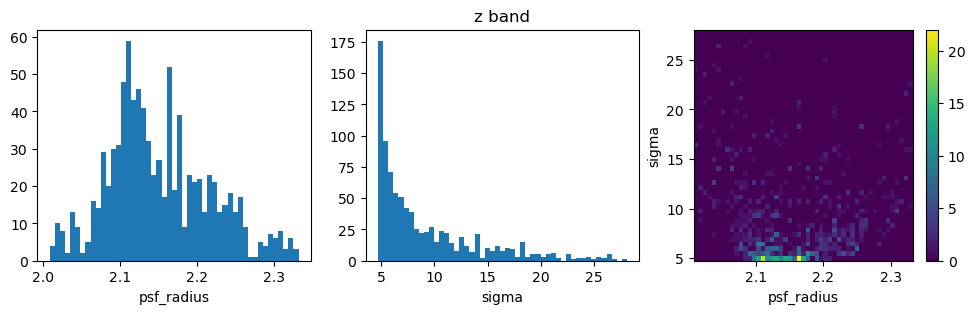

-0.06440042875310967
False
False


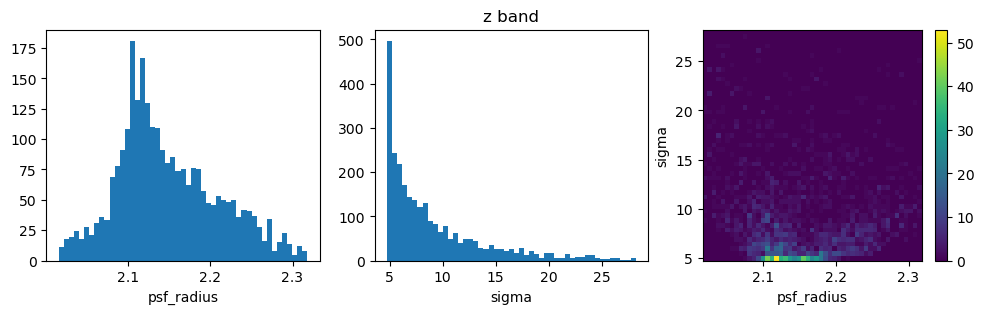

-0.11979715652210345
False
False


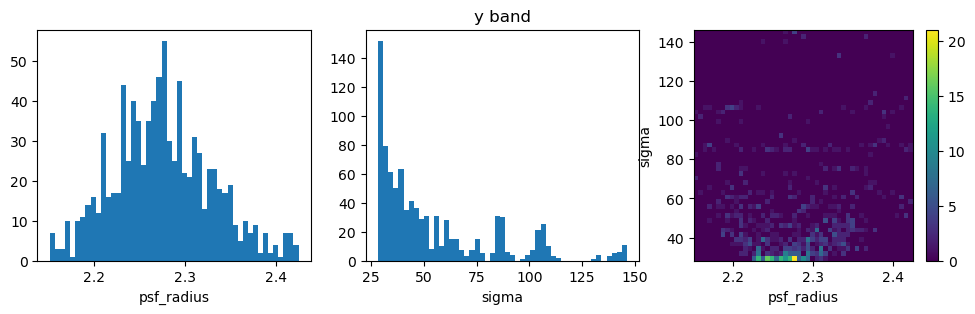

0.1327324510326494
False
False


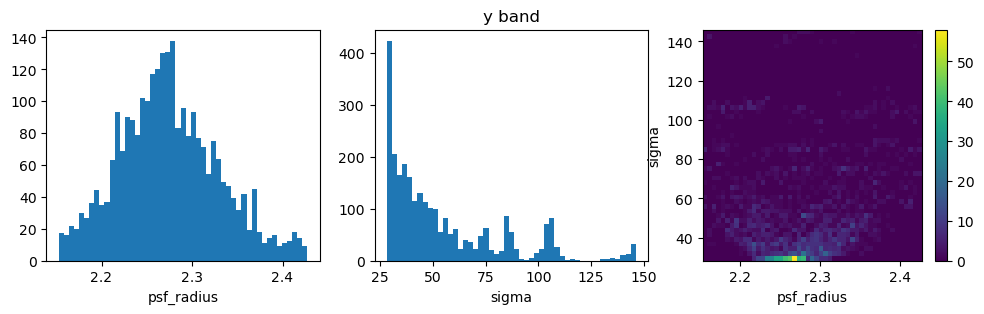

0.1694107270232817


In [25]:
#distributions 
def plot_distribs(band, sample):
    i_sigma = np.array([dic[band]['sigma'] for dic in sample])
    print(np.isnan(i_sigma).any())
    i_psf = np.array([dic[band]['psf_radius'] for dic in sample])
    print(np.isnan(i_psf).any())
    sigma_bins = np.linspace(np.percentile(i_sigma, 5), np.percentile(i_sigma, 95), 50)
    psf_bins = np.linspace(np.percentile(i_psf, 5), np.percentile(i_psf, 95), 50)

    fig, ax = plt.subplots(1,3, figsize=(12,3))

    ax[0].hist(i_psf, psf_bins)
    ax[0].set_xlabel('psf_radius')
    ax[1].hist(i_sigma, sigma_bins)
    ax[1].set_xlabel('sigma')
    # ax[1].set_xscale('log')

    H, xedges, yedges = np.histogram2d(i_psf, i_sigma, bins=[psf_bins,sigma_bins])
    x, y = np.meshgrid(xedges, yedges)

    im = ax[2].pcolormesh(x, y, H.T, cmap='viridis') # H.T is crucial for correct orientation
    # plt.pcolormesh(x, y, np.sqrt(H.T)/ H.T, cmap='viridis')
    fig.colorbar(im, ax=ax[2])
    ax[2].set_xlabel('psf_radius')
    ax[2].set_ylabel('sigma')
    # ax[2].set_yscale('log')

    ax[1].set_title(f'{band} band')
    plt.show()
    print(np.corrcoef(i_sigma, i_psf)[0,1])

for b in 'ugirzy':
    plot_distribs(b, rsp_sample)
    plot_distribs(b, rsp_sample2)

True
False


ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

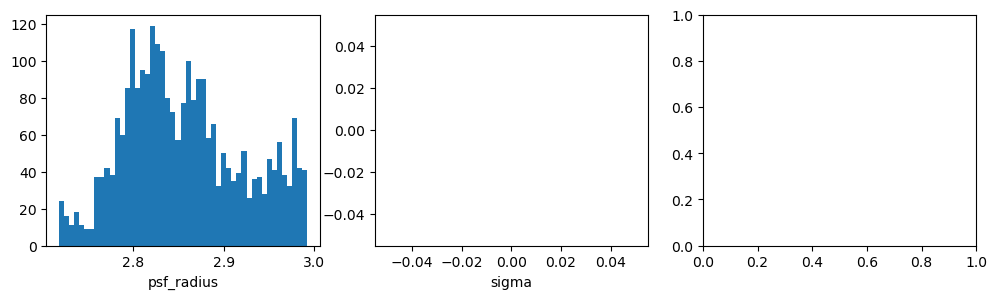

In [26]:
with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/Rubin_SV_95_-25_3000_psf.pkl', 'rb') as f:
    rsp_sample3 = pkl.load(f)

for b in 'ugirzy':
    plot_distribs(b, rsp_sample3)

True
False
[[3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]
 [3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]
 [3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]
 ...
 [3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]
 [3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]
 [3.27991237 3.28765898 3.29540559 ... 3.64400311 3.65174972 3.65949633]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

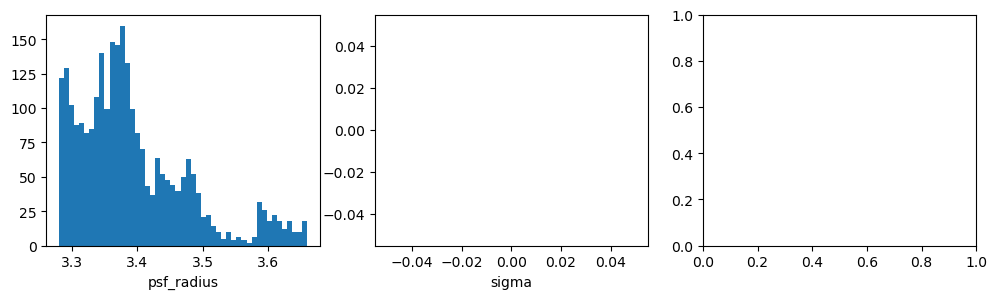

In [24]:
with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/EDFS_3000_psf.pkl', 'rb') as f:
    rsp_sample3 = pkl.load(f)

for b in 'ugirzy':
    plot_distribs(b, rsp_sample3)

In [8]:
from utils import sample_position
position = sample_position(1, 69)
# sample = rsp_sample[3].copy()
sample = rsp_sample[1].copy()
print(sample.pop('ra'))
print(sample.pop('dec'))
print(position)
print(sample)

52.904432001221075
-27.656122448979595
[[ 10.16129032 -43.71049485]]
{'r': {'psf_radius': 2.1961845765351415, 'psf_e1': 0.0888406928730624, 'psf_e2': -0.014950286212110373, 'sigma': 3.4109828, 'n_images': 29.0}, 'u': {'psf_radius': 2.9665337597593977, 'psf_e1': -0.09829312548213529, 'psf_e2': 0.057124562128989524, 'sigma': 14.555219, 'n_images': 6.533333333333333}, 'g': {'psf_radius': 2.3232876740475055, 'psf_e1': 0.043281718877622305, 'psf_e2': 0.021959248847027754, 'sigma': 2.196891, 'n_images': 38.0}, 'i': {'psf_radius': 2.075993840760107, 'psf_e1': 0.05940498560734064, 'psf_e2': -0.05043441120803677, 'sigma': 4.88947, 'n_images': 31.0}, 'z': {'psf_radius': 2.1332168256343174, 'psf_e1': -0.06533018099950973, 'psf_e2': 0.03354322686953754, 'sigma': 9.947108, 'n_images': 33.0}, 'y': {'psf_radius': 2.2126277322210464, 'psf_e1': 0.010811646325846936, 'psf_e2': 0.03859344032298738, 'sigma': 56.78308, 'n_images': 7.0}}


0.8376558201507753


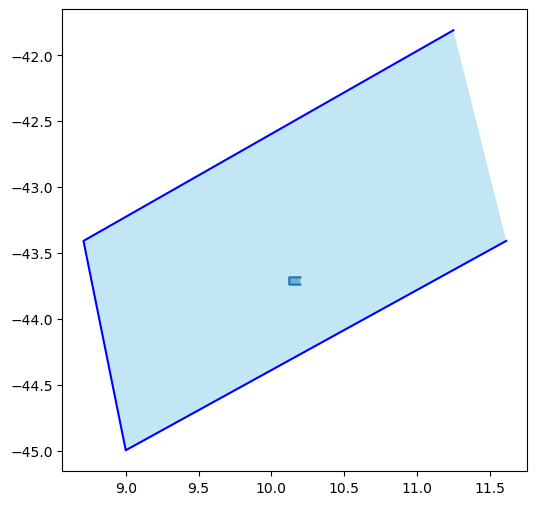

In [9]:
import healpy as hp
import galsim
nside = 32
pix = 10307
radius = 900
buffer = 50
vertices = hp.boundaries(nside, pix, step=1)  # shape (3, n_vertices)
x, y, z = vertices
theta = np.arccos(z)           # polar angle (0=North pole)
phi = np.arctan2(y, x)         # azimuthal angle
hra = np.degrees(phi)            # 0-360 degrees
hra = np.mod(hra, 360)           # ensure within 0-360
hdec = 90 - np.degrees(theta)   

print(np.cos(np.mean(hdec)))

plt.figure(figsize=(6,6))
plt.plot(hra, hdec, 'b-')  # pixel edges
plt.fill(hra, hdec, 'skyblue', alpha=0.5)

WORLD_ORIGIN = galsim.CelestialCoord(
    ra=position[0,0] * galsim.degrees,
    dec=position[0,1] * galsim.degrees,
)
wcs = galsim.TanWCS(
        affine=galsim.AffineTransform(
            0.2, 0, 0, 0.2,
            origin=galsim.PositionD(450, 450), # I need to know what Im considering the center, 
        ),                                  # since I use 0,0 as corner when sampling skycat
        world_origin=WORLD_ORIGIN,
        units=galsim.arcsec,
    )
corners = (
            (-50, -50),
            (900 + 50 , -50),
            (900+50, 900 +50),
            (-50, 900+50),
        )
vertices = []
for x, y in corners:
    sky_coord = wcs.toWorld(galsim.PositionD(x, y))
    vertices.append([sky_coord.ra / galsim.degrees, sky_coord.dec / galsim.degrees])

vertices2 = np.array(vertices)
plt.plot(vertices2[:,0], vertices2[:,1],)  # pixel edges
plt.fill(vertices2[:,0], vertices2[:,1], alpha=0.5)



In [20]:
from main import SimCatVal
ra = position[0][0]
dec = position[0][1]
# sample['i']['n_images'] = 139.0
# simp = {'i': sample['i']}
# print(simp)
afw_img, cat, truths, area = SimCatVal('/hildafs/home/pladuca/main/skyCatalog.yaml',ra,dec,1000,50,sample,31.4,True)

2026-01-13 01:55:32,053 - INFO - Catalog data will be read from /hildafs/home/pladuca/main/roman_rubin_cats_v1.1.2_faint/roman_rubin_cats_v1.1.2_faint/


Generating Sims


2026-01-13 01:55:33,481 - INFO - Working on healpix pixel 10307
2026-01-13 01:55:36,517 - INFO - Working on healpix pixel 10307


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3787 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Running Pipeline


  0%|          | 0/6 [00:00<?, ?it/s]

Done!


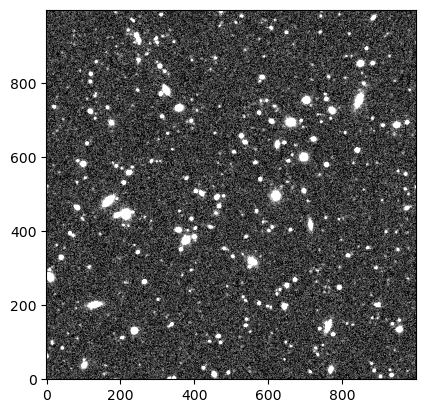

In [21]:
plt.imshow(afw_img['i'].image.array, origin='lower', cmap='gray', vmin=-3,vmax=10)

In [13]:
import pickle
run_path = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_v2/run_20260113T022420'
with open(f'{run_path}/ECDFS_sim_im.pkl', 'rb') as f:
    afw_image = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_meas_single.pkl', 'rb') as f:
    cat = pickle.load(f)
with open(f'{run_path}/ECDFS_sim_truth.pkl', 'rb') as f:
    truths = pickle.load(f)

# with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/dp1_mags_v1.pickle', 'rb') as f:
#     dp1 = pickle.load(f)


In [9]:
print(truths['i'][['flux', 'ob_type']][np.argsort(truths['i']['flux'])])
print(-2.5*np.log10(1e6) + 31.4)

       flux        ob_type
------------------ -------
 0.926828301053368  galaxy
0.9581808132434148  galaxy
0.9783941225620516  galaxy
0.9865822982484431  galaxy
0.9949532269111294  galaxy
1.0028624509937578  galaxy
1.0148858755133323  galaxy
1.0154930988293578  galaxy
1.0171094310979898  galaxy
1.0213074390955414  galaxy
               ...     ...
49927.559847812445  galaxy
 60871.75738178911    star
 75511.75634373019  galaxy
  79949.5454695292    star
  88531.9577144123    star
 90687.97555742608  galaxy
297670.82487231557  galaxy
 631282.5876767155    star
1143537.8724842316    star
2243894.7755582635    star
Length = 3225 rows
16.4


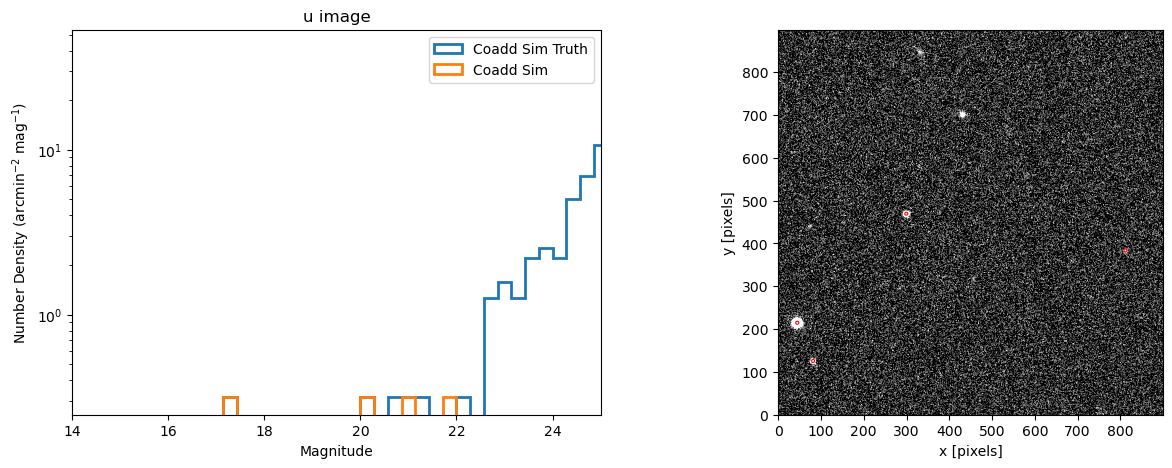

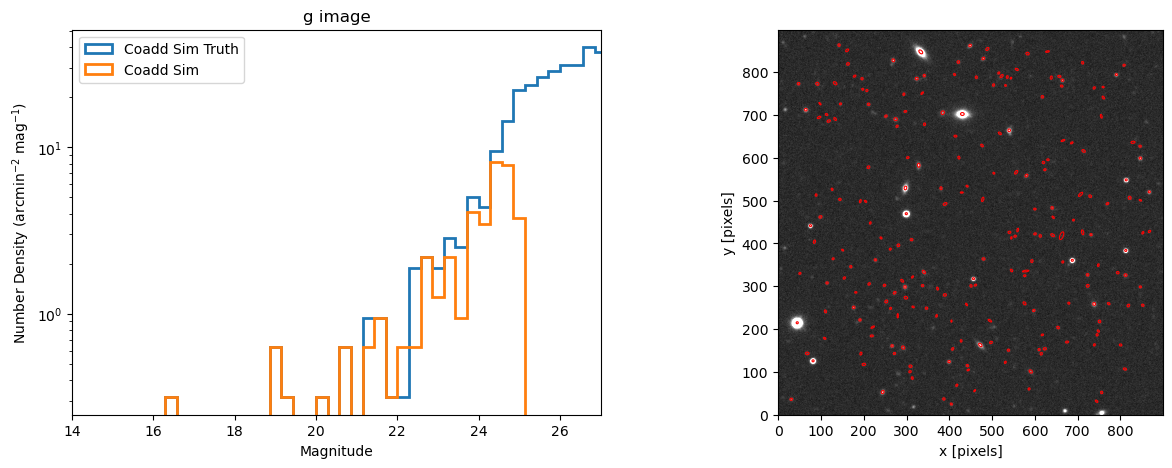

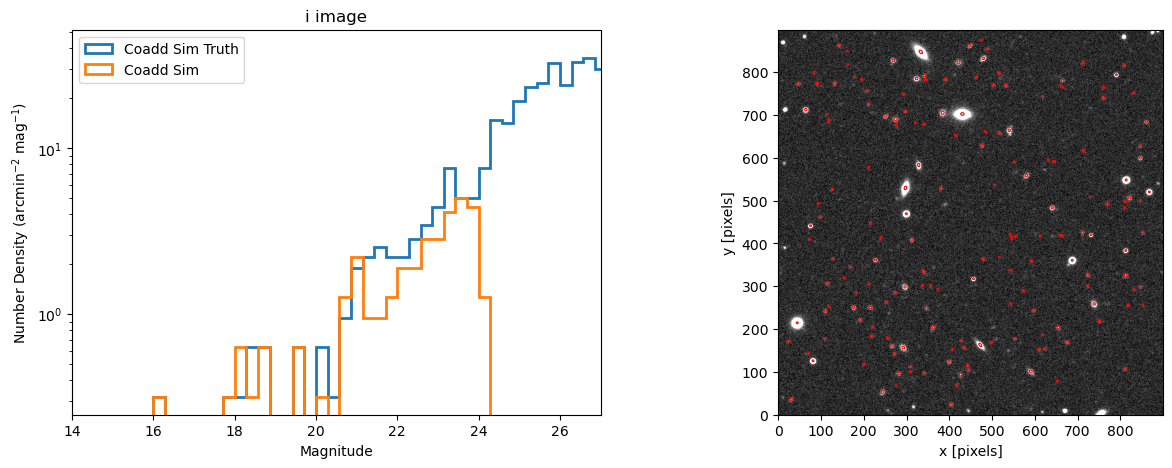

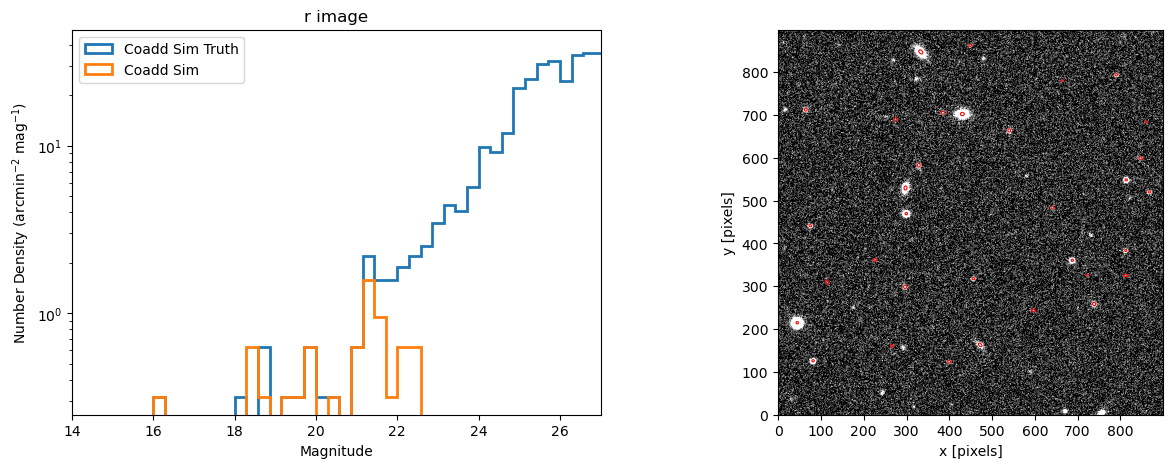

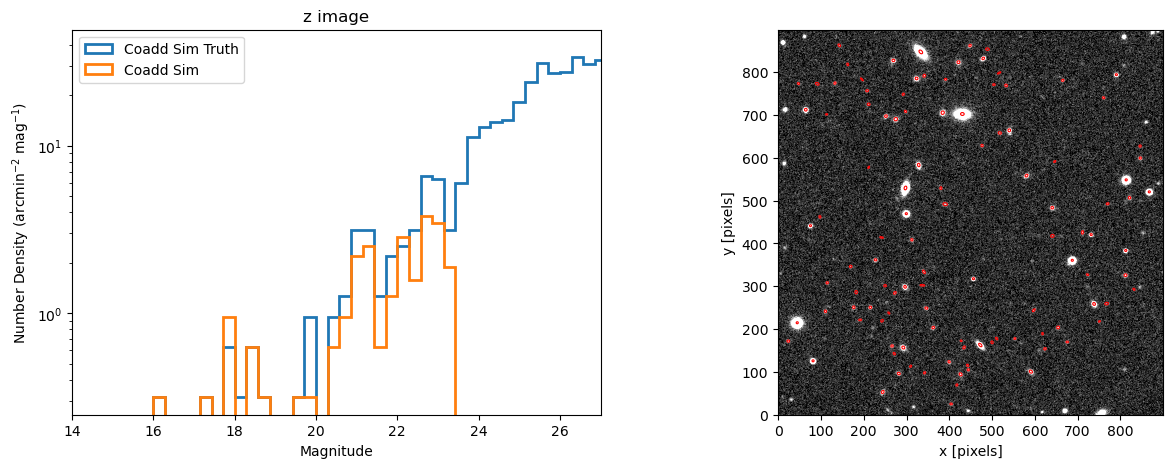

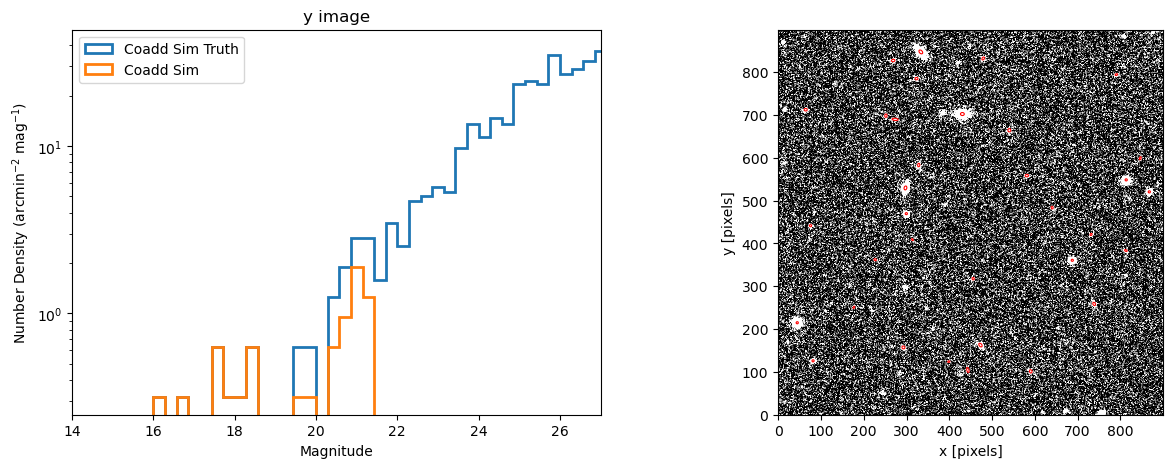

In [14]:
from matplotlib.patches import Ellipse
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, AsinhStretch

def make_some_plots(band, afw_img, cat, truth):
    # dp1_m = dp1[band]['mag']
    # dp1_w = dp1[band]['weights']
    # dp1_b = dp1[band]['bins']
    cat = cat[(cat['deblend_nChild'] == 0) &
              (cat['base_SdssShape_flag'] == False) &
              (cat['modelfit_CModel_instFlux'] >= 0) &
              (cat['modelfit_CModel_flag'] == False) &
              (cat['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
              (cat['base_SdssCentroid_flag'] == False) &
              (cat['ext_gaap_GaapFlux_flag'] == False) &
              (cat['base_ClassificationSizeExtendedness_flag'] == False)]
    mag = -2.5 * np.log10(cat['modelfit_CModel_instFlux']) + 31.4
    size = np.sqrt(cat['base_SdssShape_xx'] + cat['base_SdssShape_yy'])
    snr = (cat['base_PsfFlux_instFlux']/cat['base_PsfFlux_instFluxErr'] >= 10)
    tmag = -2.5 * np.log10(truth[band]['flux']) + 31.4
    # plt.scatter(mag, size)
    # # plt.scatter(mag, psf, s=0.3, alpha=0.3)
    # # plt.axhline(3.35, c='r')
    # # plt.axhline(2.8, c='r')
    # # plt.axvline(22.5, c='r')
    # # plt.ylim(2,5)
    # # plt.xlim(13,28)
    # plt.axhline(3.7, c='r')
    # plt.axhline(3.25, c='r')
    # plt.axvline(22.5, c='r')
    # plt.ylim(2,5)
    # plt.xlim(13,28)

    mag_bins = np.linspace(14, 28, 50)
    bin_size = mag_bins[1] - mag_bins[0]

    fig, ax = plt.subplots(1,2,figsize=(15,5))

    mag_weight = np.full_like(mag[snr], 1/((1000 * 0.2 /60)**2 *bin_size))
    tmag_weight = np.full_like(tmag, 1/((1000 * 0.2 /60)**2*bin_size))

    # ax[0].hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")
    ax[0].hist(tmag, mag_bins,weights=tmag_weight,histtype="step",linewidth=2,label="Coadd Sim Truth")
    ax[0].hist(mag[snr], mag_bins,weights=mag_weight,histtype="step",linewidth=2,label="Coadd Sim")

    ax[0].set_xlabel("Magnitude")
    ax[0].set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
    if band == 'u':
        ax[0].set_xlim(14,25)
        # ax[0].set_ylim(0,15)
    else:
        ax[0].set_xlim(14,27)
        # ax[0].set_ylim(0,30)
    ax[0].set_yscale('log')

    ax[1].imshow(afw_img['image'], origin='lower', cmap='gray', vmin=-10,vmax=50)
    # ax[1].set_xlim(500,1000)
    # ax[1].set_ylim(500,1000)
    for i in range(len(cat)):
        x = cat['base_SdssCentroid_x'][i]
        y = cat['base_SdssCentroid_y'][i]
        xx = cat['base_SdssShape_xx'][i]
        yy = cat['base_SdssShape_yy'][i]
        xy = cat['base_SdssShape_xy'][i]

        T = 0.5 * (xx + yy)
        D = np.sqrt(((xx - yy) / 2)**2 + xy**2)
        a = np.sqrt(T + D)
        b = np.sqrt(T - D)
        theta = 0.5 * np.arctan2(2 * xy, xx - yy)
        
        e = Ellipse((x, y), width=2*a, height=2*b,
                    angle=np.degrees(theta), edgecolor='red',
                    facecolor='none', lw=0.8)
        ax[1].add_patch(e)
    ax[1].set_xlabel('x [pixels]')
    ax[1].set_ylabel('y [pixels]')
    ax[0].set_title(f'{band} image')
    ax[0].legend()
    plt.show()

    
bands = 'ugirzy'
# bands = 'i'
for b in bands:
    make_some_plots(b, afw_image[b], cat[b][cat[b]['modelfit_CModel_instFlux']/cat[b]['modelfit_CModel_instFluxErr'] > 0], truths)

#need to figure out how to account for area of the image if some images are partially off of the sim catalog region